In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df1 = pd.read_csv('/content/drive/MyDrive/mini/Traffic.csv')
df2 = pd.read_csv('/content/drive/MyDrive/mini/TrafficTwoMonth.csv')
df = pd.concat([df1, df2], ignore_index=True)
df.to_csv('concat_Traffic.csv', index=False)

In [45]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               8928 non-null   object
 1   Date               8928 non-null   int64 
 2   Day of the week    8928 non-null   object
 3   CarCount           8928 non-null   int64 
 4   BikeCount          8928 non-null   int64 
 5   BusCount           8928 non-null   int64 
 6   TruckCount         8928 non-null   int64 
 7   Total              8928 non-null   int64 
 8   Traffic Situation  8928 non-null   object
dtypes: int64(6), object(3)
memory usage: 627.9+ KB


In [47]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [48]:
df.dtypes

,0
Time,object
Date,int64
Day of the week,object
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,object


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()
df['Day of the week'] = le.fit_transform(df['Day of the week'])
df['Traffic Situation'] = le.fit_transform(df['Traffic Situation'])

In [51]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,5,31,0,4,4,39,2
1,12:15:00 AM,10,5,49,0,3,3,55,2
2,12:30:00 AM,10,5,46,0,3,6,55,2
3,12:45:00 AM,10,5,51,0,2,5,58,2
4,1:00:00 AM,10,5,57,6,15,16,94,3
...,...,...,...,...,...,...,...,...,...
8923,10:45:00 PM,9,4,16,3,1,36,56,3
8924,11:00:00 PM,9,4,11,0,1,30,42,3
8925,11:15:00 PM,9,4,15,4,1,25,45,3
8926,11:30:00 PM,9,4,16,5,0,27,48,3


In [52]:
df['Traffic Situation'].value_counts()

,count
Traffic Situation,
3,5279
0,1819
2,1138
1,692


In [53]:
y = df['Traffic Situation']
x = df.drop(['Traffic Situation', 'Time'], axis=1)

In [54]:
y.dtype

dtype('int64')

In [55]:
x.dtypes

,0
Date,int64
Day of the week,int64
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test, columns=x.columns)

In [59]:
x_train

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total
0,0.556699,-0.581549,-0.233667,-0.750952,-0.055983,1.516385,-0.066514
1,1.559767,-1.076771,0.715721,-0.503404,-0.813239,-1.043450,0.072174
2,-1.672343,1.399337,-1.138896,-0.668436,-0.964690,-0.494914,-1.349378
3,-1.672343,1.399337,0.980666,0.321757,0.095468,-0.494914,0.765615
4,-0.000562,-1.076771,1.731344,-0.090823,2.064333,-1.043450,1.615079
...,...,...,...,...,...,...,...
7137,-1.003630,0.904116,1.091060,0.404273,1.382803,0.053622,1.268359
7138,-1.560891,0.408894,-1.205133,-0.998500,-0.964690,1.424962,-1.106674
7139,-1.337987,-0.581549,-1.337605,-0.915984,-0.964690,1.150694,-1.245362
7140,0.222342,1.399337,-1.028502,-0.998500,-1.040415,0.876426,-1.089338


In [60]:
x_test

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total
0,-0.446370,0.408894,1.046902,0.569306,2.215784,-1.500563,1.164343
1,-0.112014,-0.086327,0.605327,0.569306,1.609979,-0.037800,0.956311
2,0.333794,0.408894,-1.138896,-0.750952,-1.040415,2.064921,-0.898642
3,1.448315,-0.086327,-0.255745,0.981886,-0.055983,0.785004,0.141518
4,-1.115083,-1.076771,-1.205133,-0.750952,-1.040415,-0.129223,-1.366714
...,...,...,...,...,...,...,...
1781,-1.449439,-1.571992,-0.388218,-0.998500,-0.661788,1.516385,-0.378562
1782,-1.560891,0.408894,0.252067,0.816854,0.171194,-0.403491,0.332214
1783,0.333794,0.408894,-1.183054,-0.668436,-1.040415,-0.494914,-1.401386
1784,-1.337987,-0.581549,0.119594,0.899370,-0.283160,-0.769182,0.072174


In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Dropout

In [62]:
model = Sequential([
    Dense(6, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(6, activation='relu',),
    Dense(6, activation='relu',),
    Dense(4)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [64]:
model.fit(x_train, y_train, validation_split=0.2, epochs=400, batch_size=256)

Epoch 1/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0734 - loss: 1.6926 - val_accuracy: 0.0910 - val_loss: 1.5447
Epoch 2/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1179 - loss: 1.5058 - val_accuracy: 0.2043 - val_loss: 1.4207
Epoch 3/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2556 - loss: 1.3967 - val_accuracy: 0.4073 - val_loss: 1.3377
Epoch 4/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4369 - loss: 1.3224 - val_accuracy: 0.5843 - val_loss: 1.2703
Epoch 5/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5748 - loss: 1.2576 - val_accuracy: 0.6088 - val_loss: 1.1969
Epoch 6/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5952 - loss: 1.1852 - val_accuracy: 0.6109 - val_loss: 1.1193
Epoch 7/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5964 - loss: 1.1077 - val_accuracy: 0.6165 - val_loss: 1.0452
Epoch 8/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5966 - loss: 1.0443 - val_accuracy: 0.6270 - 

In [65]:
model.evaluate(x_train, y_train)

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9395 - loss: 0.1448


[0.1489783078432083, 0.9402128458023071]

In [66]:
model.evaluate(x_test, y_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9174 - loss: 0.1884


[0.1695563793182373, 0.9300112128257751]

In [67]:
y_hat = model.predict(x_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [69]:
model.save('/content/drive/MyDrive/mini/traffic_model.keas')

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/content/drive/MyDrive/mini/traffic_model.keas.

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<Axes: >

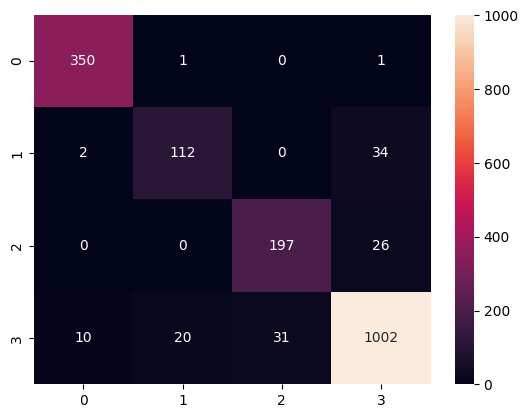

In [71]:
cm = confusion_matrix(y_test, y_hat.argmax(axis=1))
cm
sns.heatmap(cm, annot=True, fmt='d')

In [72]:
report = classification_report(y_test, y_hat.argmax(axis=1))
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       352
           1       0.84      0.76      0.80       148
           2       0.86      0.88      0.87       223
           3       0.94      0.94      0.94      1063

    accuracy                           0.93      1786
   macro avg       0.90      0.89      0.90      1786
weighted avg       0.93      0.93      0.93      1786

